# Results

In [1]:
from ammo.msm import MSMCollection, MSM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

<>:8: DeprecationWarning: invalid escape sequence \A
<>:8: DeprecationWarning: invalid escape sequence \A
<>:8: DeprecationWarning: invalid escape sequence \A
<>:8: DeprecationWarning: invalid escape sequence \A
/tmp/ipykernel_1565561/4286461779.py:8: DeprecationWarning: invalid escape sequence \A
  features = ['domain angle/$^{o}$', 'hinge RMSD/$\AA$', 'PBC RMSD/$\AA$']
/tmp/ipykernel_1565561/4286461779.py:8: DeprecationWarning: invalid escape sequence \A
  features = ['domain angle/$^{o}$', 'hinge RMSD/$\AA$', 'PBC RMSD/$\AA$']
/home/adele/Documents/allostery/ammo/msm/_msm.py:331: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([int(val) for val in ax[i].get_xticks()*factor])
/home/adele/Documents/allostery/ammo/msm/_msm.py:333: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels([val for val in ax[i].get_yticks()*factor])


## Notebook contents

1. [MSM building](#1.-MSM-building)<br>
    1.1 [Load data](#1.1-Load-data)<br>
    1.2 [Cluster](#1.2-Cluster)<br>
    1.3 [Compute ITS](#1.3-Compute-ITS)<br>
    1.4 [Build MSMs](#1.4-Build-MSMs)<br>
2. [Metastable state assignment](#2.-Metastable-state-assignment)<br>
    2.1 [PCCA](#2.1-PCCA)<br>
    2.2 [Manual](#2.2-Manual)<br>
    2.3 [Bootstrapping](#2.3-Bootstrapping)<br>
3. [Sample conformational ensembles](#3.-Sample-conformational-ensembles)<br>
    3.1 [Full ensemble](#3.1-Full-ensemble)<br>
    3.2 [Active state](#3.2-Active-state)<br>
4. [Relevant conformation plots](#4.-Relevant-conformation-plots)<br>
    4.1 [cAMP Hbonds](#4.1-cAMP-Hbonds)<br>
    4.2 [PBC conformation](#4.2-PBC-conformation)<br>
    4.3 [Hinge RMSF](#4.3-Hinge-RMSF)<br>
    4.4 [Residue 273 $\chi$1 angle](#4.4-Residue-273-$\chi$1-angle)<br>
    4.5 [I942 Hbonds](#4.5-I942-Hbonds)<br>

## 1. MSM building

### 1.1 Load data

[top](#Results)

In [2]:
titles = ['apo', 'cAMP', 'L273W', 'I942', 'I942r']
locations = [['../systems/apo/active/seeded-md_2step', '../systems/apo/inactive/seeded-md_2step'],
             ['../systems/cAMP/active/seeded-md_2step', '../systems/cAMP/inactive/seeded-md_2step'],
             ['../systems/L273W/active/seeded-md_2step', '../systems/L273W/inactive/seeded-md_2step'],
             ['../systems/I942/active/seeded-md_2step', '../systems/I942/inactive/seeded-md_2step'],
             ['../systems/I942/active/seeded-md_restr', '../systems/I942/inactive/seeded-md_restr']]
file_names = ['domain_angle.txt', 'hinge.txt', 'pbc.txt']
features = ['domain angle/$^{o}$', 'hinge RMSD/$\AA$', 'PBC RMSD/$\AA$']

In [3]:
msms = MSMCollection()

In [3]:
msms = MSMCollection('msms.pkl')

In [4]:
msms.load_data(titles, locations, file_names, features=features, missing='warn', reload=True)

Loading data...
apo MSM
../systems/apo/active/seeded-md_2step
../systems/apo/inactive/seeded-md_2step
trajectory 100/100
--------------------
cAMP MSM
../systems/cAMP/active/seeded-md_2step
../systems/cAMP/inactive/seeded-md_2step
trajectory 100/100
--------------------
L273W MSM
../systems/L273W/active/seeded-md_2step
../systems/L273W/inactive/seeded-md_2step
trajectory 100/100
--------------------
I942 MSM
../systems/I942/active/seeded-md_2step
../systems/I942/inactive/seeded-md_2step
trajectory 100/100
--------------------
I942r MSM
../systems/I942/active/seeded-md_restr
../systems/I942/inactive/seeded-md_restr
trajectory 100/100
--------------------
...done.


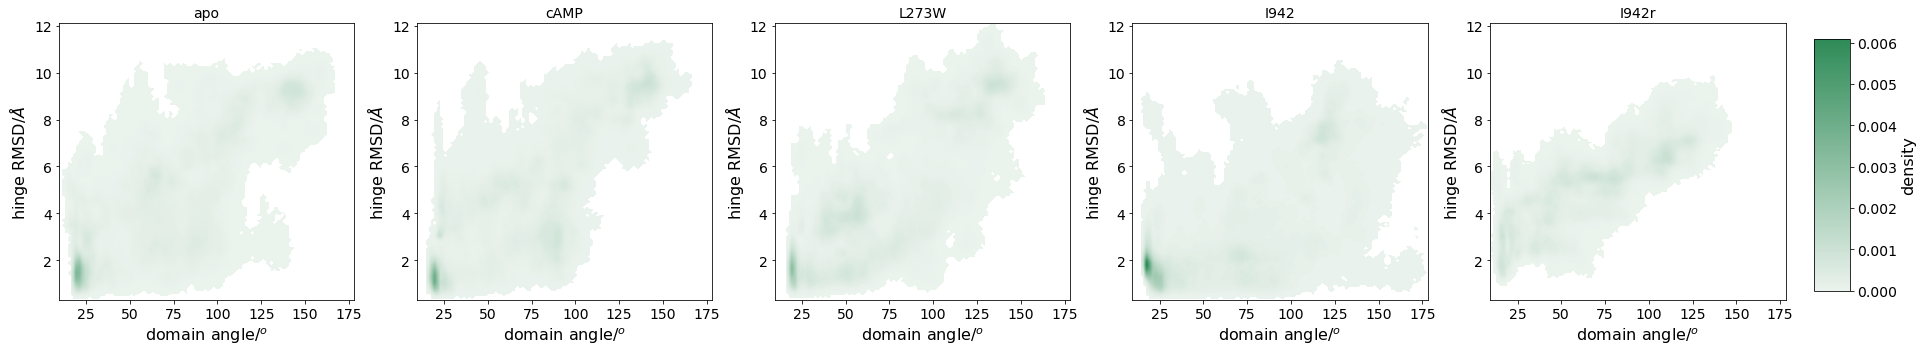

In [5]:
fig, ax, misc = msms.plot_data((1,5))

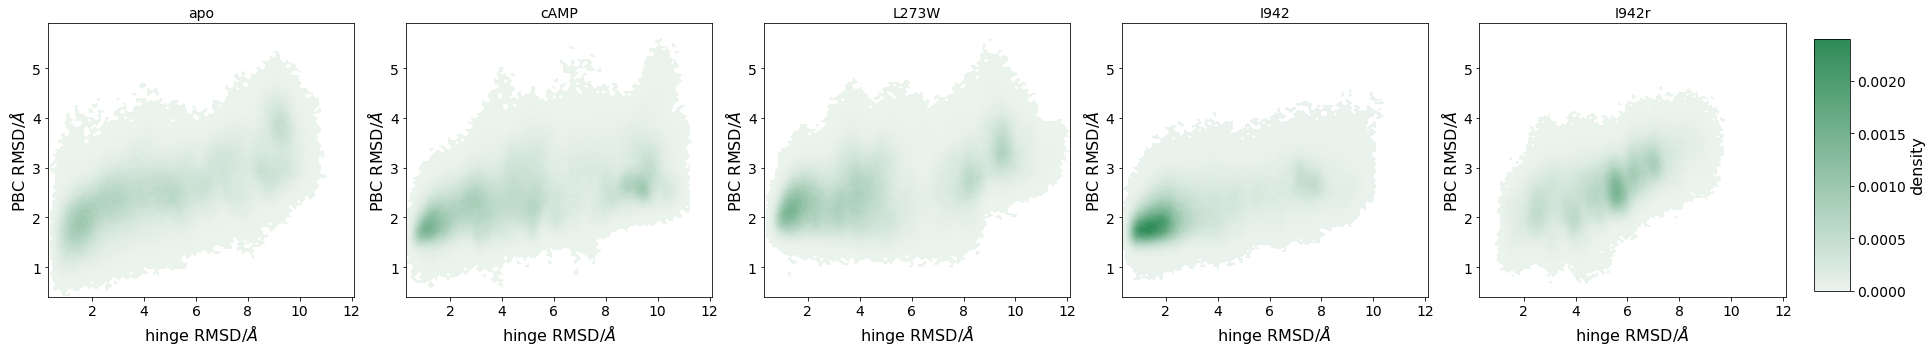

In [6]:
fig, ax, misc = msms.plot_data((1,5), x=1, y=2)

### 1.2 Cluster

[top](#Results)

In [7]:
msms.cluster(n_clusters=300, centers=np.loadtxt('clusters.txt'))

19-01-24 07:06:10 pyemma.coordinates.clustering.kmeans.KmeansClustering[0] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


In [8]:
msms.assign_to_clusters()

### 1.3 Compute ITS

[top](#Results)

Computing ITS...
apo
cAMP
L273W
I942
I942r
...done.


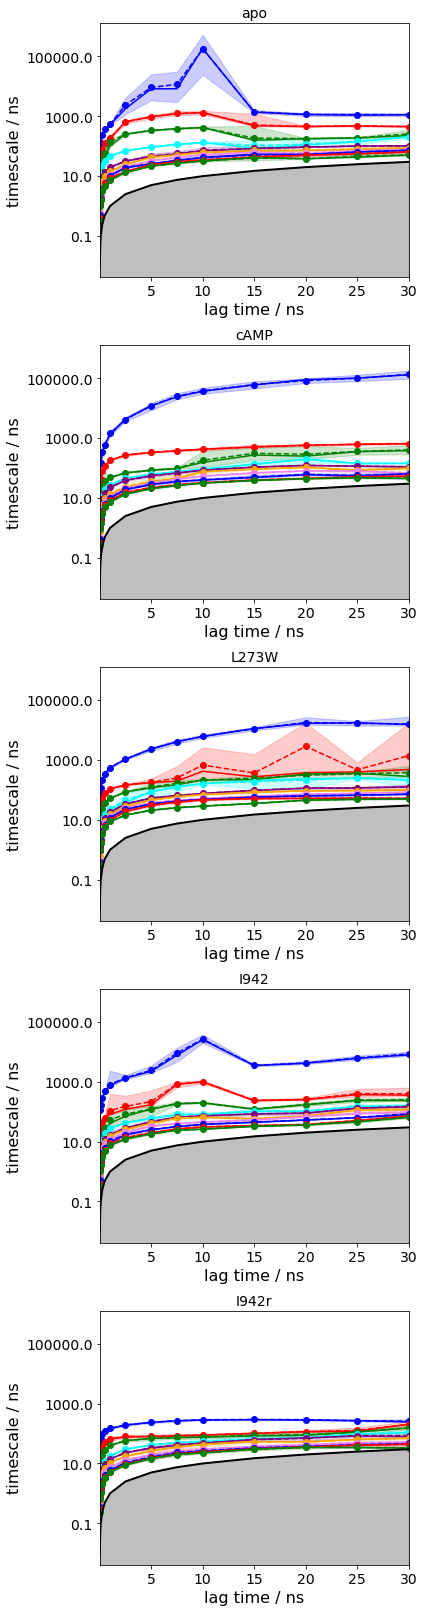

In [4]:
fig, ax = msms.compute_its(titles=titles, time_units='ns')

### 1.4 Build MSMs

[top](#Results)

25 ns lag time based on ITS above

In [11]:
msms.build_msms('25 ns')

Building MSMs...
...done.



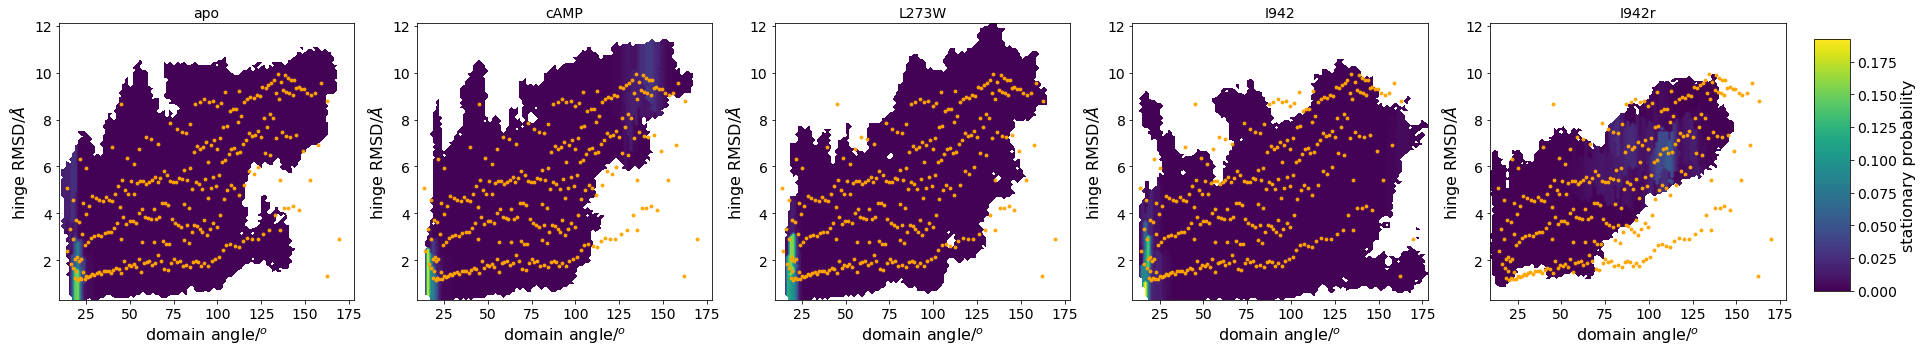

In [12]:
fig, ax, misc = msms.plot_stationary_distribution((1,5))

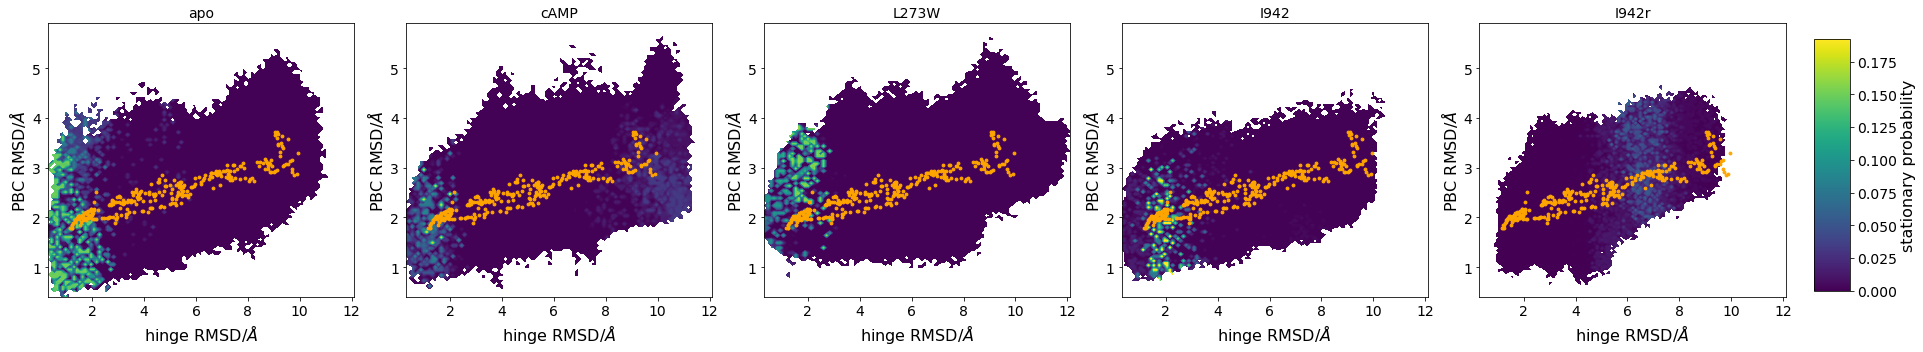

In [187]:
fig, ax, misc = msms.plot_stationary_distribution((1,5), x=1, y=2)

## 2. Metastable state assignment

### 2.1 PCCA

[top](#Results)

In [14]:
msms.pcca_assignments(3)

Metastable state assignments based on apo MSM, 3 states:
apo
MS 1 has 165 counts and 99.97% probability (± 2.3%)
MS 2 has 81 counts and 0.03% probability (± 0.0%)
MS 3 has 54 counts and 0.0% probability (± 0.0%)
--------------------
cAMP
MS 1 has 165 counts and 60.38% probability (± 1.76%)
MS 2 has 81 counts and 2.65% probability (± 0.05%)
MS 3 has 54 counts and 36.97% probability (± 0.88%)
--------------------
L273W
MS 1 has 165 counts and 99.66% probability (± 2.44%)
MS 2 has 81 counts and 0.07% probability (± 0.0%)
MS 3 has 54 counts and 0.27% probability (± 0.01%)
--------------------
I942
MS 1 has 165 counts and 93.77% probability (± 2.19%)
MS 2 has 81 counts and 2.36% probability (± 0.04%)
MS 3 has 54 counts and 3.87% probability (± 0.09%)
--------------------
I942r
MS 1 has 165 counts and 20.57% probability (± 0.31%)
MS 2 has 81 counts and 73.18% probability (± 1.27%)
MS 3 has 54 counts and 6.25% probability (± 0.3%)
--------------------

Metastable state assignments based on cA

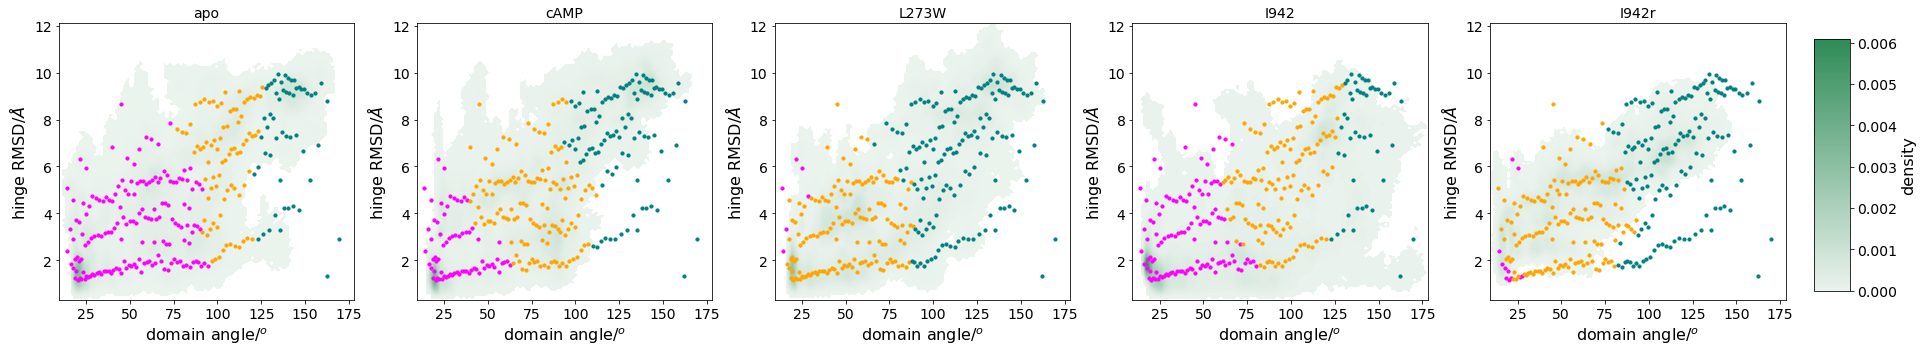

In [15]:
fig, ax, misc = msms.plot_clusters(msms.get_pcca_clusters(3), (1,5), same_clusters=False)

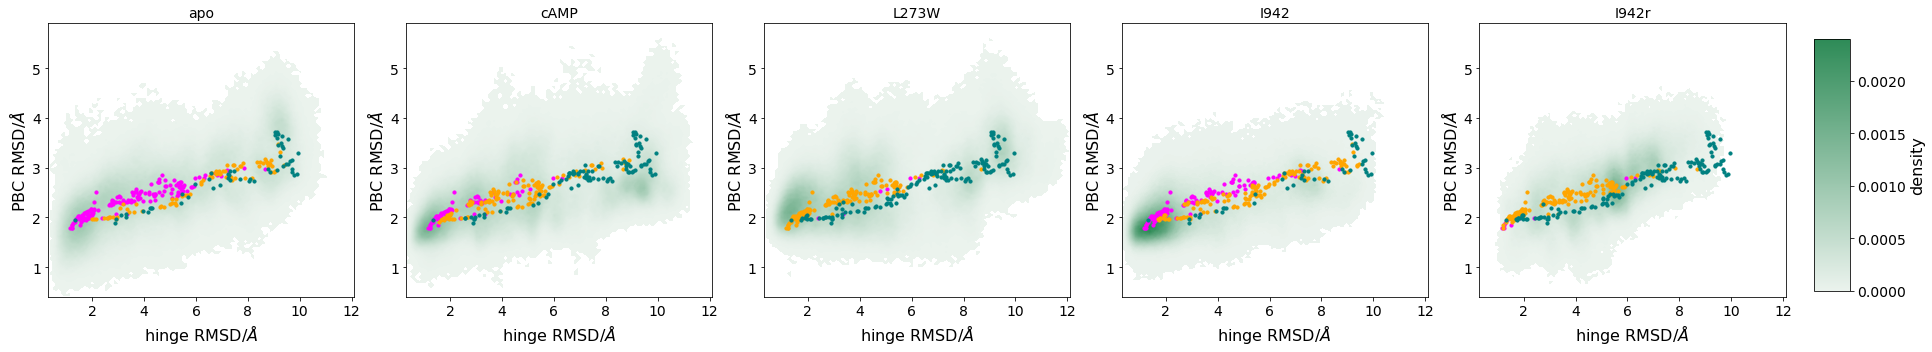

In [16]:
fig, ax, misc = msms.plot_clusters(msms.get_pcca_clusters(3), (1,5), x=1, y=2, same_clusters=False)

###  2.2 Manual

[top](#Results)

Assign metastable state centers in feature space. These are based on equilibrium MD simulation results, as well as tracking at what domain angle the RAP protein would clash with cNBD.

In [17]:
metastable_centers = np.array([[30, 1, 1], [60, 1, 2.5], [100, 8, 2.5]])

Features need to be normalized for distance calculations, otherwise the large degree angle values would contribute the most to the distance. All coordinates are normalized to be up to 1.

In [18]:
norm = msms.clusters.clustercenters.max(axis=0)
norm_metastable_centers = metastable_centers/norm

Go over each cluster center and assign to the closest metastable center:

In [19]:
manual_assignment = [[], [], []]

for i, cluster in enumerate(msms.clusters.clustercenters):
    # normalize cluster
    cluster = cluster/norm
    # find closest metastble center
    idx = np.linalg.norm(norm_metastable_centers-cluster, axis=1).argmin()
    manual_assignment[idx].append(i)

manual_assignment = [np.array(state) for state in manual_assignment]

Add to a dummy "manual" MSM for easier use:

In [20]:
msms.add_msm('manual')
msms['manual'].pcca[3] = manual_assignment

Calculate stationary probabilities and plot:

In [21]:
msms.pcca_assignments(3, 'manual', titles=titles)

Metastable state assignments based on manual MSM, 3 states:
apo
MS 1 has 11 counts and 66.55% probability (± 6.04%)
MS 2 has 141 counts and 33.17% probability (± 0.94%)
MS 3 has 148 counts and 0.28% probability (± 0.01%)
--------------------
cAMP
MS 1 has 11 counts and 50.88% probability (± 5.09%)
MS 2 has 141 counts and 9.52% probability (± 0.33%)
MS 3 has 148 counts and 39.59% probability (± 0.62%)
--------------------
L273W
MS 1 has 11 counts and 50.66% probability (± 4.56%)
MS 2 has 141 counts and 48.93% probability (± 2.0%)
MS 3 has 148 counts and 0.41% probability (± 0.01%)
--------------------
I942
MS 1 has 11 counts and 52.65% probability (± 5.43%)
MS 2 has 141 counts and 41.36% probability (± 1.34%)
MS 3 has 148 counts and 5.99% probability (± 0.07%)
--------------------
I942r
MS 1 has 11 counts and 0.0% probability (± 0.0%)
MS 2 has 141 counts and 1.09% probability (± 0.03%)
MS 3 has 148 counts and 98.91% probability (± 1.02%)
--------------------



In [22]:
msms['manual'].cluster_centers = msms.clusters.clustercenters

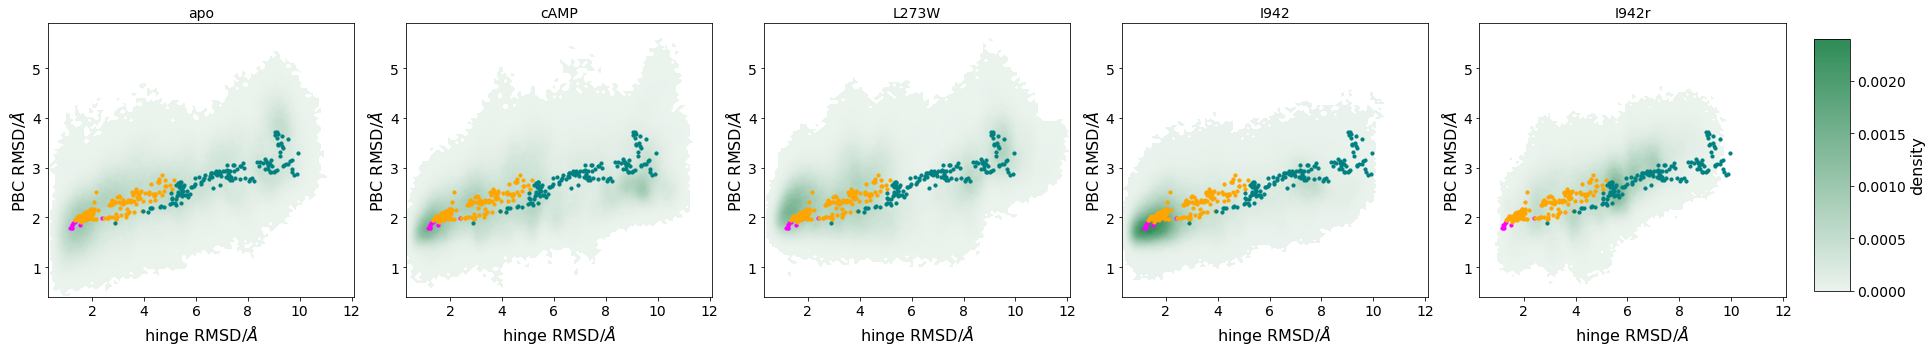

In [23]:
fig, ax, misc = msms.plot_clusters(msms.get_pcca_clusters(3, 'manual')[0], (1,5), titles, x=1, y=2)

Plot the manual state partitioning over stationary probabilities:

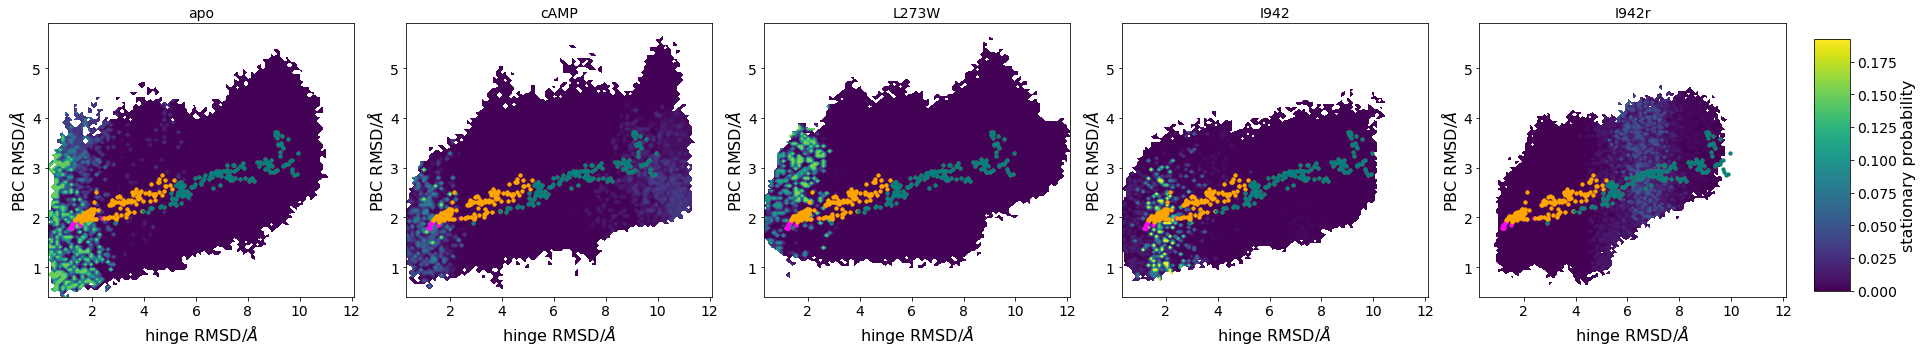

In [270]:
fig, ax, misc = msms.plot_stationary_distribution((1,5), x=1, y=2, titles=titles)

metastable_colors = ['magenta', 'orange', 'teal']

for i in range(3):
    clusters = msms.clusters.clustercenters[msms['manual'].pcca[3][i]]
    for j in range(5):
        ax[0,j].scatter(clusters[:,1], clusters[:,2], s=10, color=metastable_colors[i])
        
fig.savefig('stationary.png', dpi=300, bbox_inches='tight')

### 2.3 Bootstrapping

[top](#Results)

Run bootstrapping by resampling to generate a distribution of state probabilities. Here the manual state assignment will be used.

In [24]:
bootstrapped = msms.bootstrapping(3, 'manual', titles, '25 ns')

Bootstrapped probabilities, based on manual MSM, 3 states:
apo
State 1: 62.81% ± 12.93% (100 iterations)
State 2: 36.82% ± 12.87% (100 iterations)
State 3: 0.37% ± 0.48% (100 iterations)
------------------------------
cAMP
State 1: 52.86% ± 27.4% (100 iterations)
State 2: 10.1% ± 5.59% (100 iterations)
State 3: 37.04% ± 30.93% (100 iterations)
------------------------------
L273W
State 1: 51.02% ± 6.52% (100 iterations)
State 2: 48.06% ± 6.39% (100 iterations)
State 3: 0.92% ± 2.41% (100 iterations)
------------------------------
I942
State 1: 49.39% ± 11.35% (100 iterations)
State 2: 39.49% ± 8.18% (100 iterations)
State 3: 11.12% ± 16.81% (100 iterations)
------------------------------
I942r
State 1: 0.0% ± 0.0% (100 iterations)
State 2: 1.17% ± 0.77% (100 iterations)
State 3: 98.83% ± 0.77% (100 iterations)
------------------------------


Plot probability distribution mean values as a bar plot, with the standard deviation of each distribution as the error.

In [38]:
colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13]]
hatches = ['..', 'xx', 'o', '-', '|']

In [41]:
probabilities = np.array([[bootstrapped[msm][state][0] for state in range(1,4)] for msm in titles])
sdev = np.array([[bootstrapped[msm][state][1] for state in range(1,4)] for msm in titles])

(0.0, 104.86449999999999)

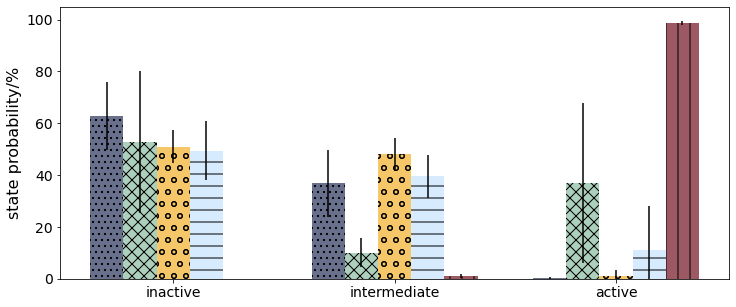

In [45]:
fig, ax = plt.subplots(figsize=(12,5))

x = np.arange(3) # 3 states
offsets = [-0.3, -0.15, 0.0, 0.15, 0.3] # 5 systems
state_labels = ['inactive', 'intermediate', 'active']

for i in range(5):
    ax.bar(x+offsets[i], probabilities[i], yerr=sdev[i], color=colors[i], hatch=hatches[i], alpha=0.7, width=0.15)

ax.set_xticks(x)
ax.set_xticklabels(state_labels)
ax.set_ylabel('state probability/%')
ax.set_ylim(0, None)

In [46]:
fig.savefig('probabilities.png', dpi=300)

Plot each state individually:

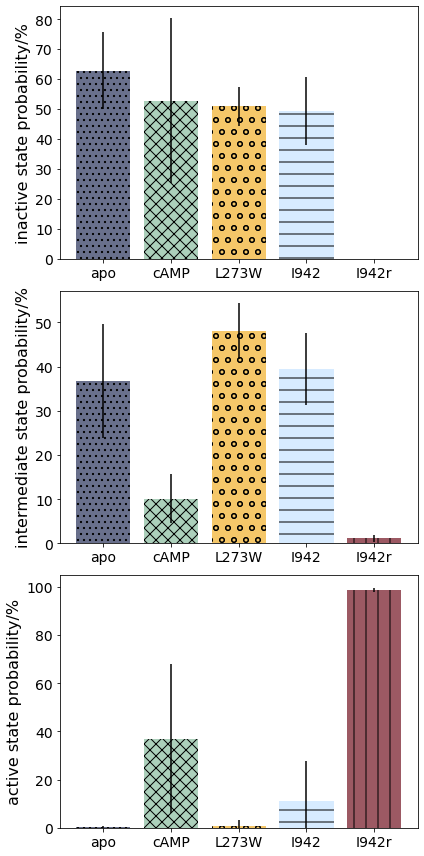

In [186]:
state_labels = ['inactive', 'intermediate', 'active']

fig, ax = plt.subplots(3, 1, figsize=(6,12))

for state in range(1,4):
    probabilities = np.array([bootstrapped[msm][state][0] for msm in titles])
    sdev = np.array([bootstrapped[msm][state][1] for msm in titles])
    
    x = np.arange(5)
    
    for i in range(5):
        ax[state-1].bar(x[i], probabilities[i], yerr=sdev[i], color=colors[i], hatch=hatches[i], alpha=0.7)
    ax[state-1].set_xticks(x)
    ax[state-1].set_xticklabels(titles)
    ax[state-1].set_ylabel(f'{state_labels[state-1]} state probability/%')
    ax[state-1].set_ylim(0, None)
    
fig.tight_layout()
fig.savefig('probabilities_2.png', dpi=300)

## 3. Sample conformational ensembles

### 3.1 Full ensemble

[top](#Results)

The function below samples the seeded MD pool based on the probabilities of the states each frame is assigned to. If the probabilities are not specified, the stationary diustributions from the MSMs are used.

In [ ]:
for title in ['I942r']:
    samples = msms[title].sample_weighted_trajectories(10000, f'{msms[title].locations[0]}/stationary.nc', f'{msms[title].locations[0]}/../system-setup/system_dry.prm7')

### 3.2 Active state

[top](#Results)

To compare the active state conformations in each system, only the active state is sampled from the seeded MD data pool here.

In order to only sample the active state, each cluster is checked. If a cluster does not belong to the active conformation according to the manual state assignment above, it is assigned 0% probability, to exclude it from sampling. Stationary probabilities from the MSM are kept for the active macrostate clusters. Additionally, disconnected sets are removed.

All of the probabilities have to sum to 1, so to recover that after exlcuding inactive/intermediate probabilities, the remaining probabilities are reweighted by dividing them by their total sum.

In [66]:
reweighted_active = []

for title in titles:
    # find all active state probabilities
    active_probabilities = []
    for i, prob in enumerate(msms[title].stationary_distribution):
        # check if cluster connected
        if i in msms[title].msm.connected_sets[0]:
            # check if cluster active
            if i in msms['manual'].pcca[3][2]:
                active_probabilities.append(prob)
            else:
                active_probabilities.append(0)
    # reweight active state probabilities
    active_probabilities = np.array(active_probabilities)
    reweighted = active_probabilities/active_probabilities.sum()
    # check the reweighting worked
    print(f'{title}: active state probabilities sum to {round(active_probabilities.sum(), 3)}, reweighted sum to {round(reweighted.sum(), 2)}')
    reweighted_active.append(reweighted)

apo: active state probabilities sum to 0.003, reweighted sum to 1.0
cAMP: active state probabilities sum to 0.396, reweighted sum to 1.0
L273W: active state probabilities sum to 0.004, reweighted sum to 1.0
I942: active state probabilities sum to 0.06, reweighted sum to 1.0
I942r: active state probabilities sum to 0.989, reweighted sum to 1.0


Sample the active state only:

In [ ]:
for i, title in enumerate(titles):
    samples = msms[title].sample_weighted_trajectories(10000, f'{msms[title].locations[0]}/active.nc', f'{msms[title].locations[0]}/../system-setup/system_dry.prm7', [reweighted_active[i]])

## 4. Relevant conformation plots

### 4.1 cAMP Hbonds

[top](#Results)

In [192]:
camp_hbonds = pd.read_csv('../systems/cAMP/active/seeded-md_2step/cAMP_hbonds.txt', delim_whitespace=True).iloc[:,1:]

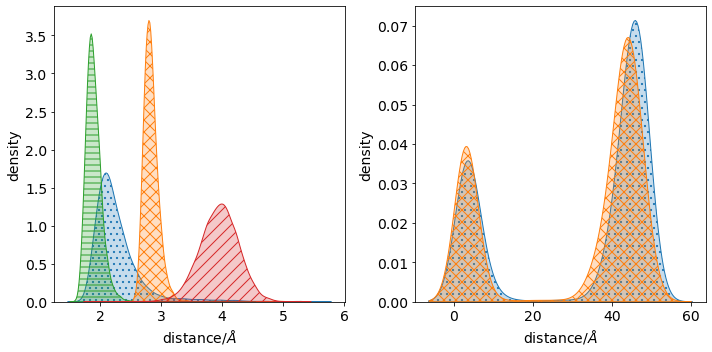

In [211]:
bonds = [['G269', 'R279', 'A280', 'A281'], ['K353', 'E315']]
hatches = ['..', 'xx', '--', '//']

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in range(2):
    for j in range(len(bonds[i])):
        sns.kdeplot(camp_hbonds[bonds[i][j]], ax=ax[i], shade=True, hatch=hatches[j], label=bonds[i][j])
    ax[i].set_xlabel('distance/$\AA$', size=14)
    ax[i].set_ylabel('density', size=14)
    #ax[i].legend()

fig.tight_layout()
fig.savefig('cAMP_hbonds.png', dpi=300)

### 4.2 PBC conformation

[top](#Results)

In [205]:
ala230 = []

In [209]:
for i in range(len(titles)):
    loc = locations[i][0]
    with open('Ala230_phi.in', 'w') as file:
        file.writelines([f'parm {loc}/../system-setup/system_dry.prm7\n',
                         f'trajin {loc}/stationary.nc\n',
                         f'dihedral 230_phi :229@C :230@N :230@CA :230@C out {loc}/Ala230_phi.txt\n',
                          'go\nquit\n'])
    subprocess.run(['cpptraj', '-i', 'Ala230_phi.in'], stdout=subprocess.DEVNULL)
    
    data = np.loadtxt(f'{loc}/Ala230_phi.txt')[:,1]
    ala230.append(data)

Plot apo, cAMP, and L273W:

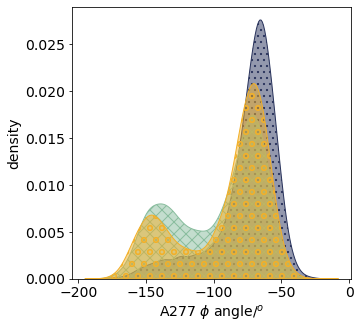

In [287]:
fig, ax = plt.subplots(1, figsize=(5,5))

colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13]]
hatches = ['..', 'xx', 'o', '-', '|']

for i in range(3):
    sns.kdeplot(ala230[i], ax=ax, shade=True, hatch=hatches[i], color=colors[i], alpha=0.5)

ax.set_xlabel('A277 $\phi$ angle/$^{o}$', size=14)
ax.set_ylabel('density', size=14)

fig.savefig('ala230_1.png', dpi=300, bbox_inches='tight')

Plot cAMP, I942, and I942r:

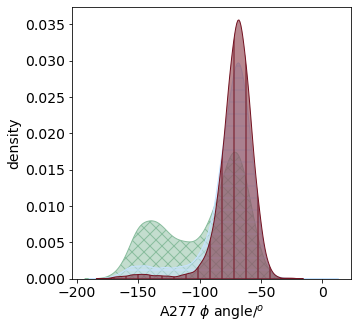

In [272]:
fig, ax = plt.subplots(1, figsize=(5,5))

colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13]]
hatches = ['..', 'xx', 'o', '-', '|']

for i in [1, 3, 4]:
    sns.kdeplot(ala230[i], ax=ax, shade=True, hatch=hatches[i], color=colors[i], alpha=0.5)

ax.set_xlabel('A277 $\phi$ angle/$^{o}$', size=14)
ax.set_ylabel('density', size=14)

fig.savefig('ala230_2.png', dpi=300, bbox_inches='tight')

### 4.3 Hinge RMSF 

[top](#Results)

In [239]:
hinge_rmsf = []

for i in range(len(titles)):
    loc = locations[i][0]
    with open('hinge_rmsf.in', 'w') as file:
        file.writelines([f'parm {loc}/../system-setup/system_dry.prm7\n',
                         f'trajin {loc}/stationary.nc\n',
                          'parm ../inputs/inactive.pdb name ref_parm\n',
                          'reference ../inputs/inactive.pdb parm ref_parm\n',
                          'rms :250-256&(!@/H) reference\n',
                         f'rmsf out {loc}/hinge_rmsf.txt :250-263&(!@/H) byres\n',
                          'go\nquit\n'])
    subprocess.run(['cpptraj', '-i', 'hinge_rmsf.in'], stdout=subprocess.DEVNULL)
    
    data = np.loadtxt(f'{loc}/hinge_rmsf.txt')[:,1]
    hinge_rmsf.append(data)

Plot apo, cAMP, and L273W:

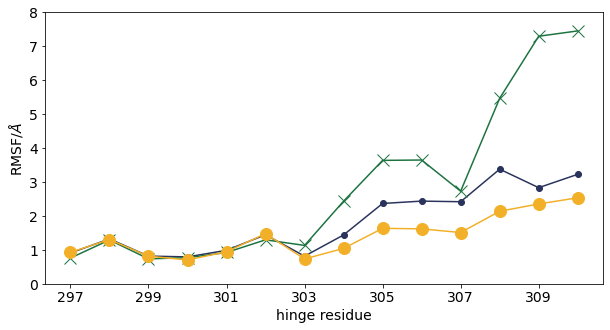

In [292]:
fig, ax = plt.subplots(1, figsize=(10,5))

colors = [[0.16, 0.2, 0.36], [0.11, 0.45, 0.25], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13]]
markers = ['.', 'x', 'o', '-', '|']

x = np.arange(250,264)

for i in range(3):
    ax.plot(x, hinge_rmsf[i], marker=markers[i], markersize=12, color=colors[i])

ax.set_xlabel('hinge residue', size=14)
ax.set_ylabel('RMSF/$\AA$', size=14)
ax.set_ylim(0, 8)

ax.set_xticklabels([None, 297, 299, 301, 303, 305, 307, 309])

fig.savefig('hinge_rmsf_1.png', dpi=300)

Plot cAMP, I942, and I942r:

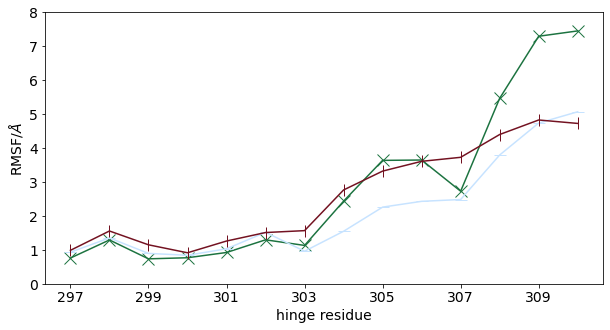

In [291]:
fig, ax = plt.subplots(1, figsize=(10,5))

colors = [[0.16, 0.2, 0.36], [0.11, 0.45, 0.25], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13]]
markers = ['.', 'x', 'o', '_', '|']

x = np.arange(250,264)

for i in [1, 3, 4]:
    ax.plot(x, hinge_rmsf[i], marker=markers[i], markersize=12, color=colors[i])

ax.set_xlabel('hinge residue', size=14)
ax.set_ylabel('RMSF/$\AA$', size=14)
ax.set_ylim(0, 8)

ax.set_xticklabels([None, 297, 299, 301, 303, 305, 307, 309])

fig.savefig('hinge_rmsf_2.png', dpi=300)

### 4.4 Residue 273 $\chi$1 angle

[top](#Results)

In [248]:
leu273 = []

for i in range(len(titles)):
    loc = locations[i][0]
    with open('Leu226_chi.in', 'w') as file:
        file.writelines([f'parm {loc}/../system-setup/system_dry.prm7\n',
                         f'trajin {loc}/stationary.nc\n',
                         f'dihedral 226_chi :226@N :226@CA :226@CB :226@CG out {loc}/Leu226_chi.txt\n',
                          'go\nquit\n'])
    subprocess.run(['cpptraj', '-i', 'Leu226_chi.in'], stdout=subprocess.DEVNULL)
    
    data = np.loadtxt(f'{loc}/Leu226_chi.txt')[:,1]
    leu273.append(data)

Plot apo, cAMP, and L273W:

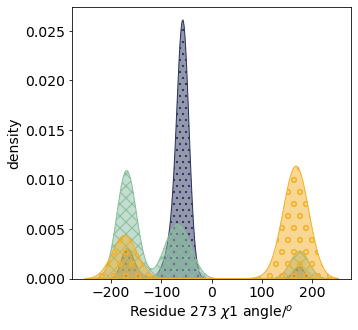

In [273]:
fig, ax = plt.subplots(1, figsize=(5,5))

colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13]]
hatches = ['..', 'xx', 'o', '-', '|']

for i in range(3):
    sns.kdeplot(leu273[i], ax=ax, shade=True, hatch=hatches[i], color=colors[i], alpha=0.5)

ax.set_xlabel('Residue 273 $\chi$1 angle/$^{o}$', size=14)
ax.set_ylabel('density', size=14)

fig.savefig('leu226_1.png', dpi=300, bbox_inches='tight')

Plot cAMP, I942, and I942r:

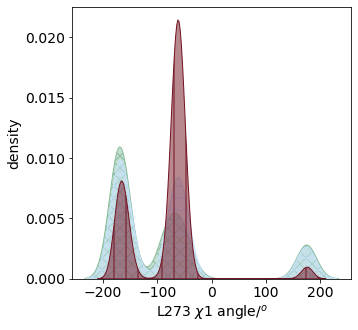

In [274]:
fig, ax = plt.subplots(1, figsize=(5,5))

colors = [[0.16, 0.2, 0.36], [0.537, 0.741, 0.6196], [0.95, 0.69, 0.16], [0.78, 0.89, 1.0], [0.45, 0.07, 0.13]]
hatches = ['..', 'xx', 'o', '-', '|']

for i in [1, 3, 4]:
    sns.kdeplot(leu273[i], ax=ax, shade=True, hatch=hatches[i], color=colors[i], alpha=0.5)

ax.set_xlabel('L273 $\chi$1 angle/$^{o}$', size=14)
ax.set_ylabel('density', size=14)

fig.savefig('leu226_2.png', dpi=300, bbox_inches='tight')

### 4.5 I942 Hbonds

[top](#Results)

In [260]:
i942_hbonds = pd.read_csv('../systems/I942/active/seeded-md_2step/I942_hbonds.txt', delim_whitespace=True).iloc[:,1:]

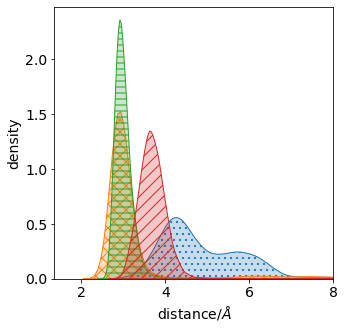

In [263]:
fig, ax = plt.subplots(1, figsize=(5,5))

hatches = ['..', 'xx', '--', '//']

for i in range(len(i942_hbonds.columns)):
    sns.kdeplot(i942_hbonds.iloc[:,i], ax=ax, shade=True, hatch=hatches[i])
    
ax.set_ylabel('density', size=14)
ax.set_xlabel('distance/$\AA$', size=14)
ax.set_xlim(None, 8)

fig.savefig('I942_hbonds.png', dpi=300)